###Alfiansyah Hidayat - Data Science

##import the library


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data Set

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Credit Card Churn - Dataset.csv')

##Data understanding

In [3]:
df.head()


,client_id,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,...,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
0,719455083,0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,...,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,773503308,0,59,M,1,Uneducated,Single,Less than $40K,Blue,53,...,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,715452408,0,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,...,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,711264033,0,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,...,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,718943508,0,42,M,3,Unknown,Single,$80K - $120K,Blue,33,...,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584


Fitur-Fitur :
- client_id: ID dari masing-masing customer
- label: Status churn dari customer (1 : churn; 0 : no churn)
- usia: Usia dari customer (tahun)
- gender: Jenis kelamin (M = Male, F = Female)
- jumlah_tanggungan: Jumlah tanggungan customer
- pendidikan: Tingkat pendidikan customer (high school, college graduate, dll.)
- status_nikah: Status nikah (married, single, divorced, unknown)
- penghasilan_tahunan: Kategori penghasilan tahunan customer (dalam $)
- tipe_kartu_kredit: Tipe kartu kredit yang dipegang customer (Blue, Silver, Gold, Platinum)
- lama_nasabah: Lama customer sudah menjadi nasabah (bulan)
- jumlah_produk: Jumlah produk yang dimiliki customer
- bulan_nonactive: Lama customer tidak aktif dalam 12 bulan terakhir (dalam bulan)
- jumlah_kontak: Jumlah kontak dalam 12 bulan terakhir
- total_limit_kredit: Total limit kredit yang diperoleh oleh customer
- total_limit_kredit_dipakai: Total limit kredit yang sudah dipakai oleh customer
- sisa_limit_kredit: Sisa limit kredit yang dimiliki customer
- rasio_transaksi_Q4_Q1: Rasio total nominal transaksi di Q4 terhadap Q1
- total_transaksi: Total nominal transaksi dalam 12 bulan terakhir
- jumlah_transaksi: Jumlah transaksi dalam 12 bulan terakhir
- rasio_jumlah_transaksi_Q4_Q1: Rasio jumlah transaksi di Q4 terhadap Q1
- rasio_pemakaian: Rasio pemakaian limit kredit

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.info()
#informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   client_id                     5000 non-null   int64  
 1   label                         5000 non-null   int64  
 2   usia                          5000 non-null   int64  
 3   gender                        5000 non-null   object 
 4   jumlah_tanggungan             5000 non-null   int64  
 5   pendidikan                    5000 non-null   object 
 6   status_nikah                  5000 non-null   object 
 7   penghasilan_tahunan           5000 non-null   object 
 8   tipe_kartu_kredit             5000 non-null   object 
 9   lama_nasabah                  5000 non-null   int64  
 10  jumlah_produk                 5000 non-null   int64  
 11  bulan_nonactive               5000 non-null   int64  
 12  jumlah_kontak                 5000 non-null   int64  
 13  tot

In [6]:
df.describe(include ='all')
# Descriptive analysis for numerical data

,client_id,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,...,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
count,5.000000e+03,5000.000000,5000.00000,5000,5000.00000,5000,5000,5000,5000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
unique,NaN,NaN,NaN,2,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2675,NaN,1508,2300,1763,4652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.390590e+08,0.160000,46.38880,NaN,2.36100,NaN,NaN,NaN,NaN,35.913000,...,2.335400,2.464800,8637.409280,1171.823200,7465.586080,0.758146,4347.268800,64.434600,0.711494,0.277980
std,3.679612e+07,0.366643,8.03182,NaN,1.31203,NaN,NaN,NaN,NaN,7.922751,...,1.004146,1.101546,9112.079042,814.875378,9116.649832,0.220429,3343.231144,23.164582,0.241518,0.277661
min,7.080846e+08,0.000000,26.00000,NaN,0.00000,NaN,NaN,NaN,NaN,13.000000,...,0.000000,0.000000,1438.300000,0.000000,14.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130287e+08,0.000000,41.00000,NaN,1.00000,NaN,NaN,NaN,NaN,31.000000,...,2.000000,2.000000,2571.750000,475.500000,1297.750000,0.629000,2132.750000,45.000000,0.578000,0.026000
50%,7.179772e+08,0.000000,46.00000,NaN,2.00000,NaN,NaN,NaN,NaN,36.000000,...,2.000000,2.000000,4566.500000,1279.000000,3423.500000,0.735000,3889.000000,67.000000,0.700000,0.181000
75%,7.728630e+08,0.000000,52.00000,NaN,3.00000,NaN,NaN,NaN,NaN,40.000000,...,3.000000,3.000000,11003.000000,1792.000000,9836.250000,0.859000,4747.000000,80.000000,0.816000,0.511000


In [7]:

df.shape
#cek data shape

(5000, 21)

In [8]:
df.count()

client_id                       5000
label                           5000
usia                            5000
gender                          5000
jumlah_tanggungan               5000
pendidikan                      5000
status_nikah                    5000
penghasilan_tahunan             5000
tipe_kartu_kredit               5000
lama_nasabah                    5000
jumlah_produk                   5000
bulan_nonactive                 5000
jumlah_kontak                   5000
total_limit_kredit              5000
total_limit_kredit_dipakai      5000
sisa_limit_kredit               5000
rasio_transaksi_Q4_Q1           5000
total_transaksi                 5000
jumlah_transaksi                5000
rasio_jumlah_transaksi_Q4_Q1    5000
rasio_pemakaian                 5000
dtype: int64

In [9]:
df.isna().sum()
#hadling mising value

client_id                       0
label                           0
usia                            0
gender                          0
jumlah_tanggungan               0
pendidikan                      0
status_nikah                    0
penghasilan_tahunan             0
tipe_kartu_kredit               0
lama_nasabah                    0
jumlah_produk                   0
bulan_nonactive                 0
jumlah_kontak                   0
total_limit_kredit              0
total_limit_kredit_dipakai      0
sisa_limit_kredit               0
rasio_transaksi_Q4_Q1           0
total_transaksi                 0
jumlah_transaksi                0
rasio_jumlah_transaksi_Q4_Q1    0
rasio_pemakaian                 0
dtype: int64

In [10]:
df.columns

Index(['client_id', 'label', 'usia', 'gender', 'jumlah_tanggungan',
       'pendidikan', 'status_nikah', 'penghasilan_tahunan',
       'tipe_kartu_kredit', 'lama_nasabah', 'jumlah_produk', 'bulan_nonactive',
       'jumlah_kontak', 'total_limit_kredit', 'total_limit_kredit_dipakai',
       'sisa_limit_kredit', 'rasio_transaksi_Q4_Q1 ', 'total_transaksi',
       'jumlah_transaksi', 'rasio_jumlah_transaksi_Q4_Q1', 'rasio_pemakaian'],
      dtype='object')

In [11]:
df.select_dtypes(include="object").nunique()

gender                 2
pendidikan             7
status_nikah           4
penghasilan_tahunan    6
tipe_kartu_kredit      4
dtype: int64

In [12]:
df.select_dtypes(exclude="object").nunique()

client_id                       5000
label                              2
usia                              45
jumlah_tanggungan                  6
lama_nasabah                      44
jumlah_produk                      6
bulan_nonactive                    7
jumlah_kontak                      7
total_limit_kredit              3580
total_limit_kredit_dipakai      1659
sisa_limit_kredit               3911
rasio_transaksi_Q4_Q1            964
total_transaksi                 3366
jumlah_transaksi                 121
rasio_jumlah_transaksi_Q4_Q1     734
rasio_pemakaian                  896
dtype: int64

In [13]:
df.describe(include="object").T

,count,unique,top,freq
gender,5000,2,F,2675
pendidikan,5000,7,Graduate,1508
status_nikah,5000,4,Married,2300
penghasilan_tahunan,5000,6,Less than $40K,1763
tipe_kartu_kredit,5000,4,Blue,4652


##EDA

unvariate

<Axes: xlabel='usia', ylabel='count'>

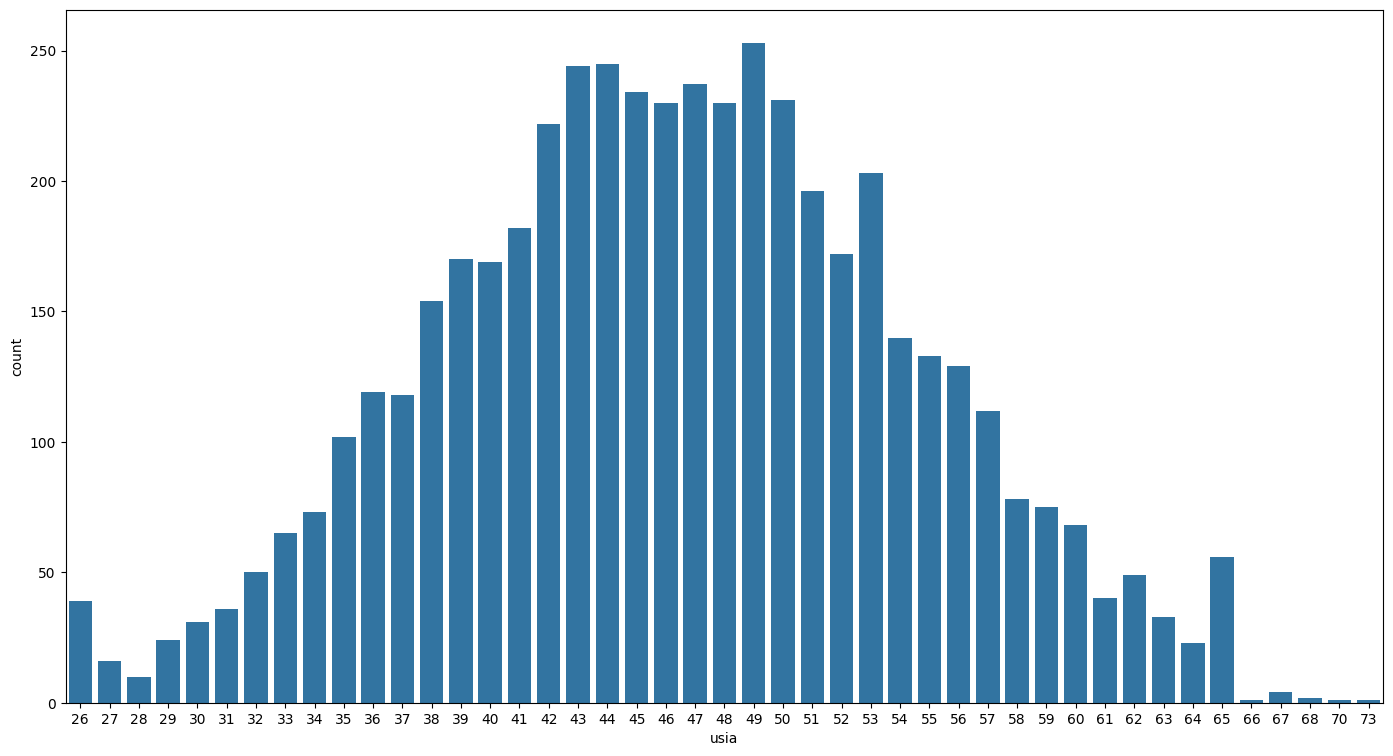

In [14]:
plt.figure(figsize = (17,9))
sns.countplot(data=df,x='usia')

<Axes: xlabel='pendidikan', ylabel='count'>

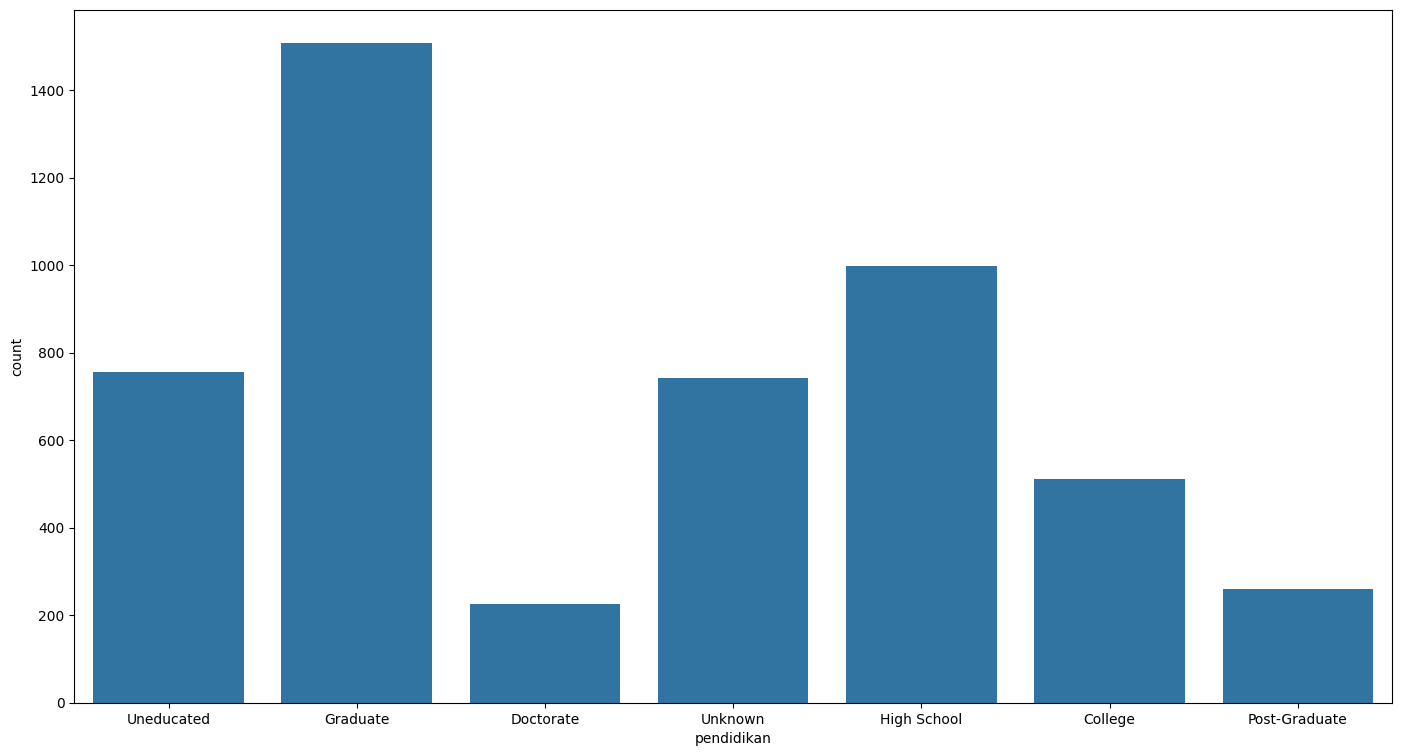

In [15]:
plt.figure(figsize = (17,9))
sns.color_palette("deep")
sns.countplot(data=df,x='pendidikan')

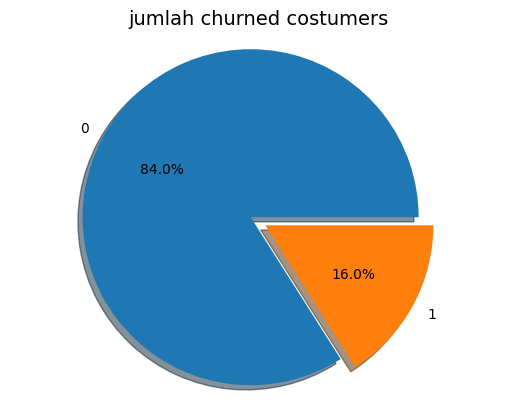

Total number of customers: 5000
1 = churn | 0 = no churn
label
0    4200
1     800
Name: count, dtype: int64


In [16]:
target = df ["label"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(target, labels = target.index, autopct = '%1.1f%%', shadow = True, explode = [0.1, 0])
ax1.axis('equal')
plt.title("jumlah churned costumers", fontsize = 14)
plt.show()
print('Total number of customers:',df['label'].count())
print('1 = churn | 0 = no churn')
print(df['label'].value_counts())

<Axes: xlabel='status_nikah', ylabel='count'>

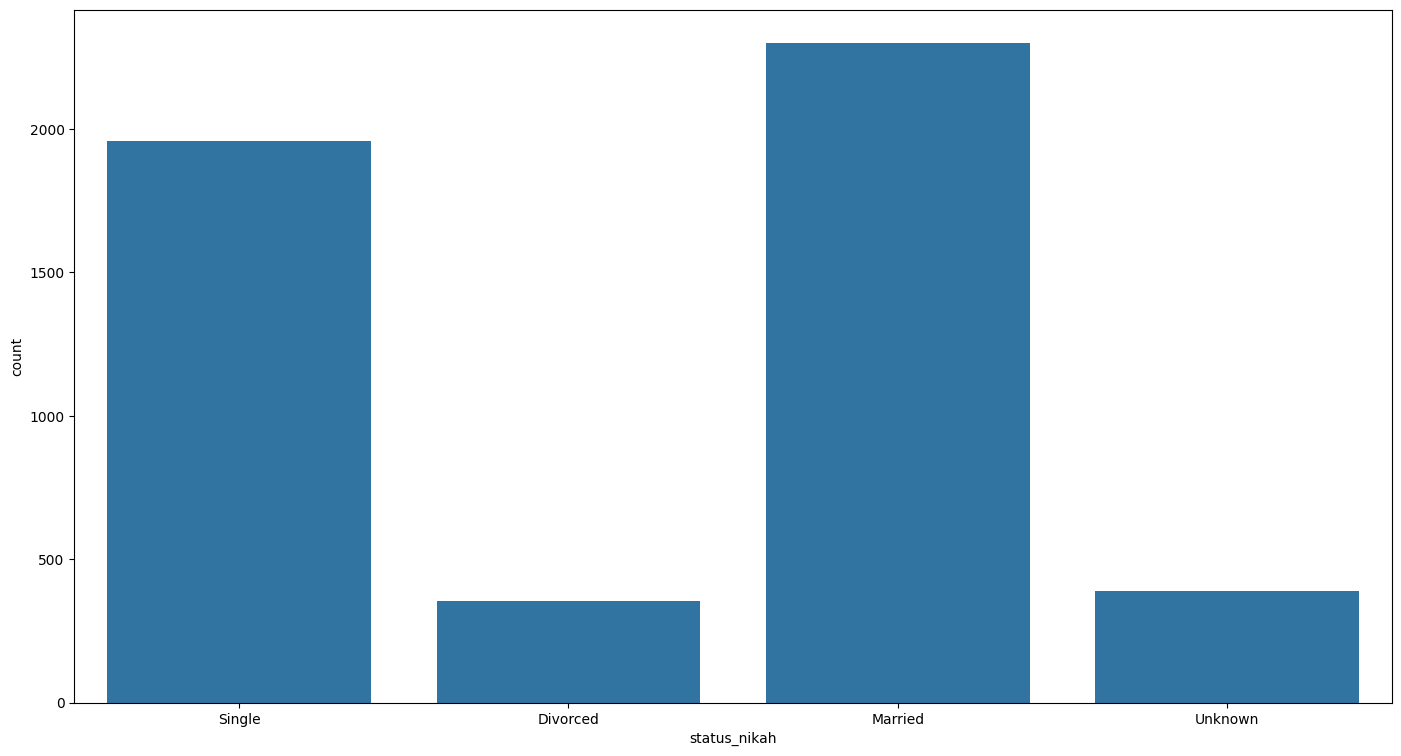

In [17]:
plt.figure(figsize = (17,9))
sns.countplot(data=df,x='status_nikah')

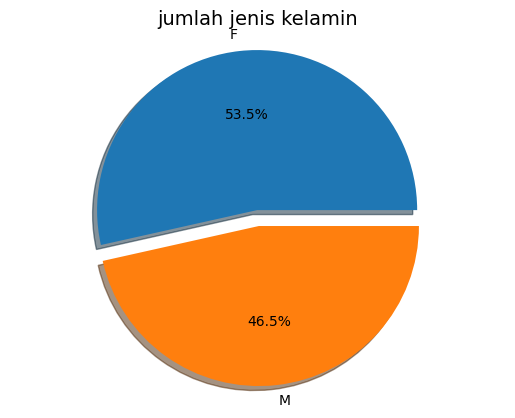

Total number of customers: 5000
gender
F    2675
M    2325
Name: count, dtype: int64


In [18]:
target = df ["gender"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(target, labels = target.index, autopct = '%1.1f%%', shadow = True, explode = [0.1, 0])
ax1.axis('equal')
plt.title("jumlah jenis kelamin", fontsize = 14)
plt.show()
print('Total number of customers:', df['gender'].count())
print(df['gender'].value_counts())

In [19]:
# Splitting columns into Categorical and Numerical Features
categorical_features = [
    'label', 'gender', 'pendidikan', 'status_pernikahan',
    'penghasilan_tahunan', 'tipe_kartu_kredit'
]

numerical_features = [
    'usia', 'jumlah_tanggungan', 'lama_nasabah',
    'jumlah_produk', 'bulan_nonactive',
    'jumlah_kontak', 'total_limit_kredit', 'total_limit_kredit_dipakai',
    'sisa_limit_kredit', 'total_transaksi',
    'jumlah_transaksi', 'rasio_jumlah_transaksi_Q4_Q1', 'rasio_pemakaian'
]

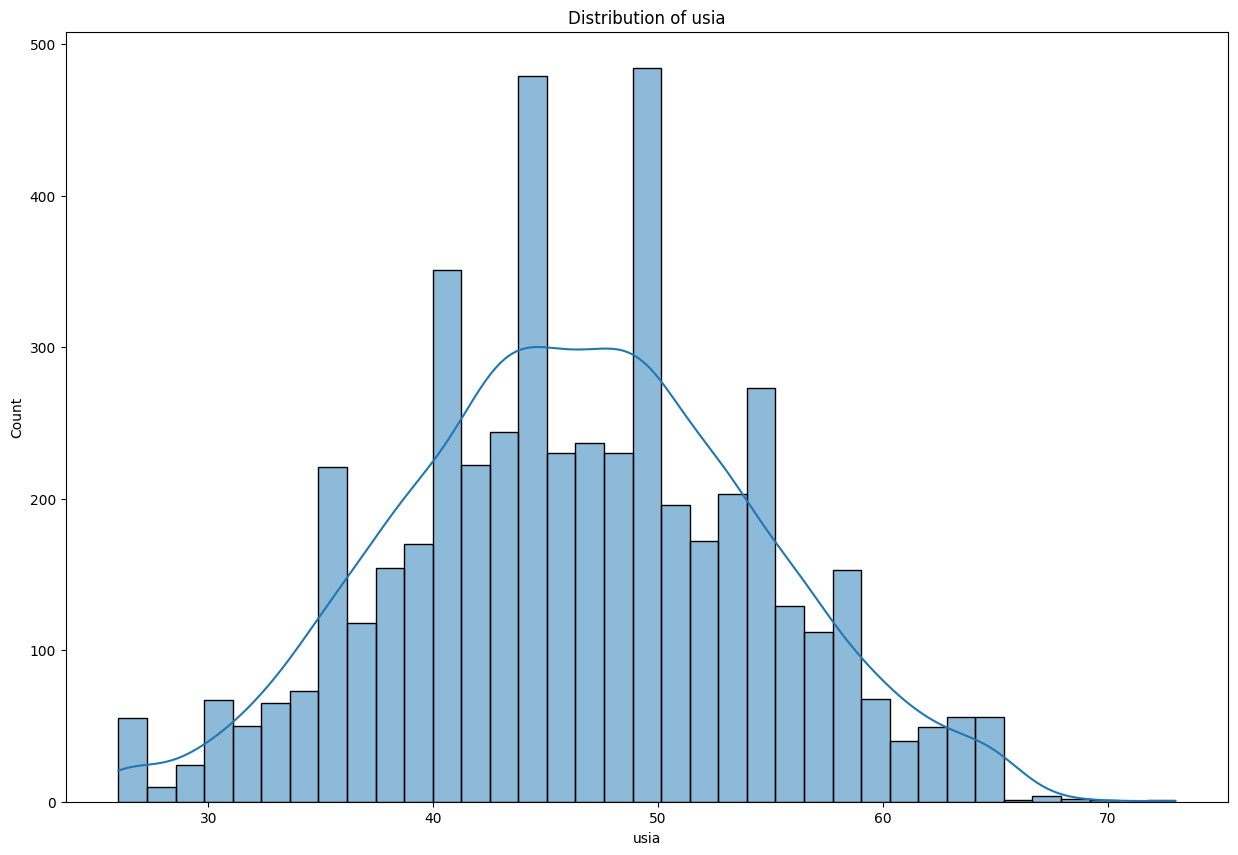

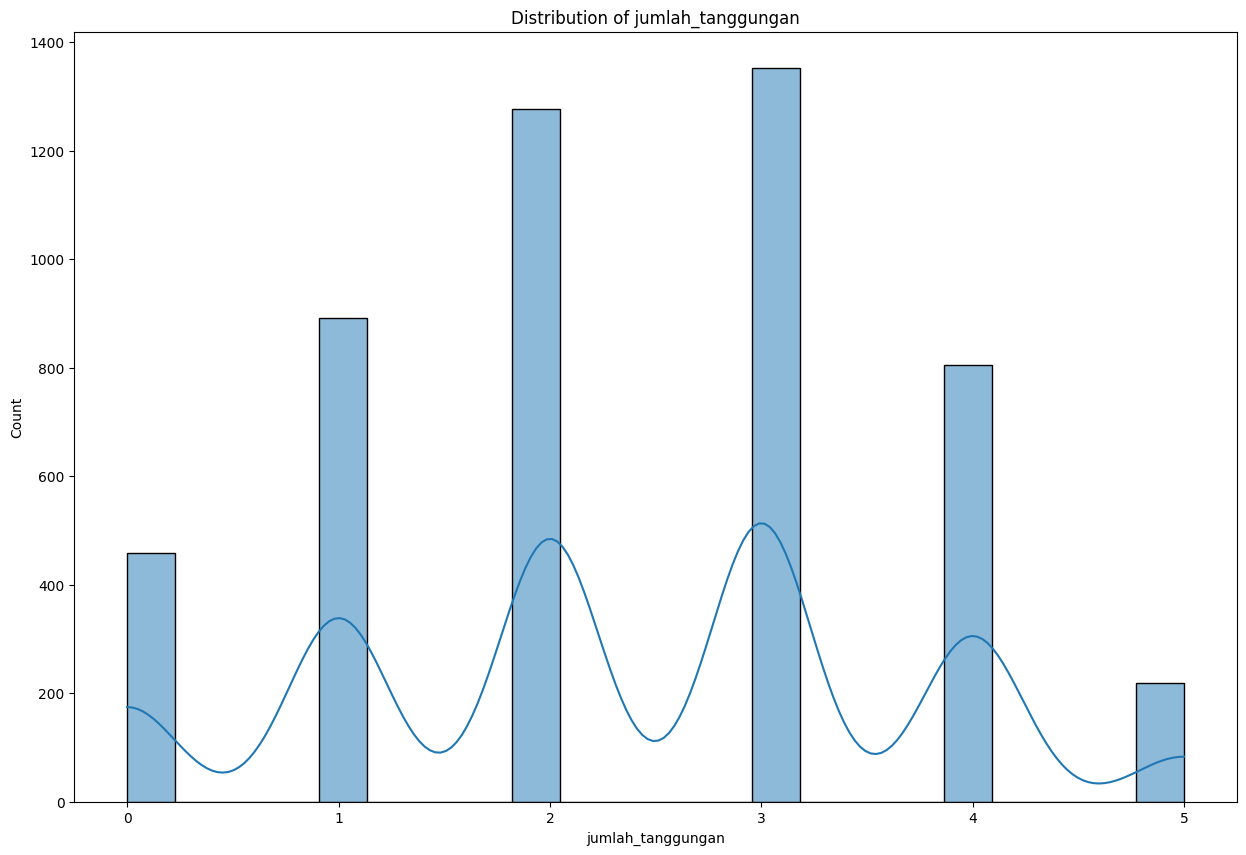

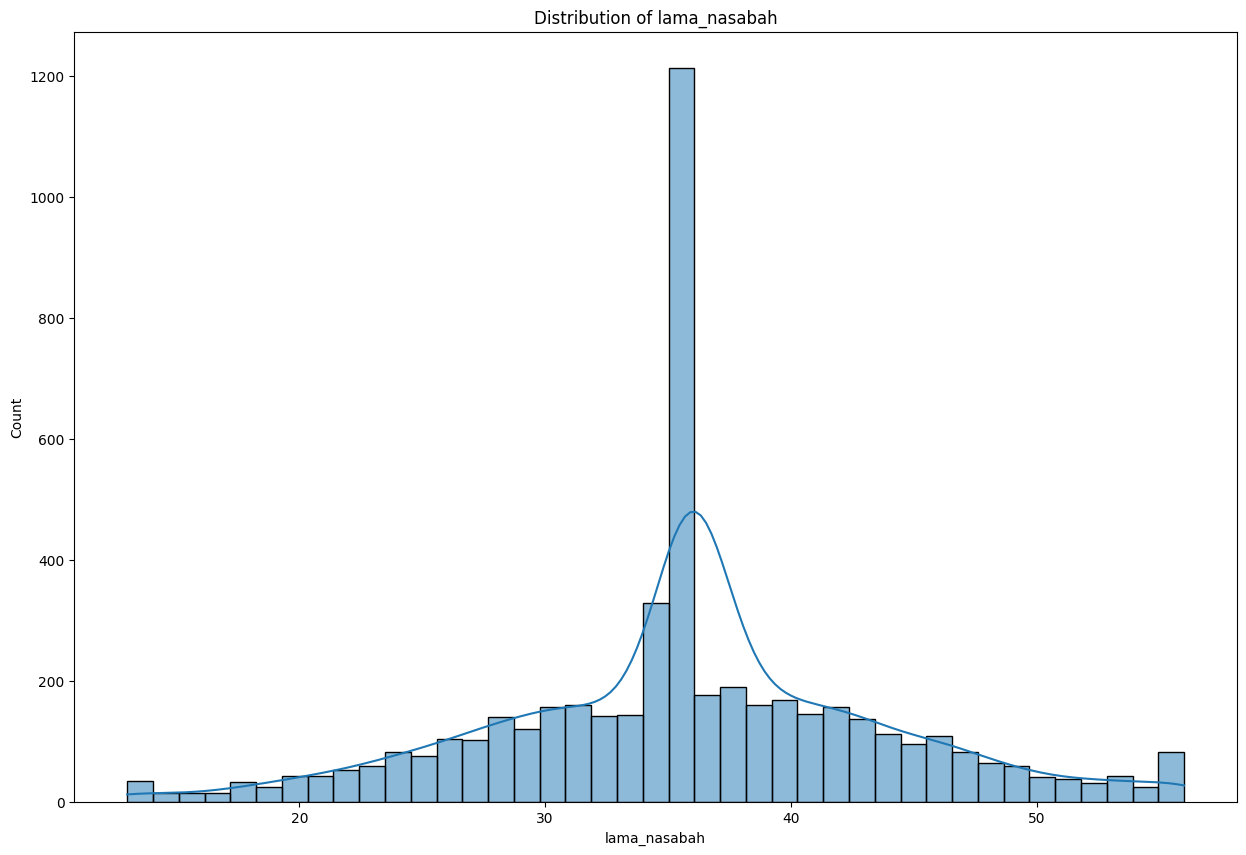

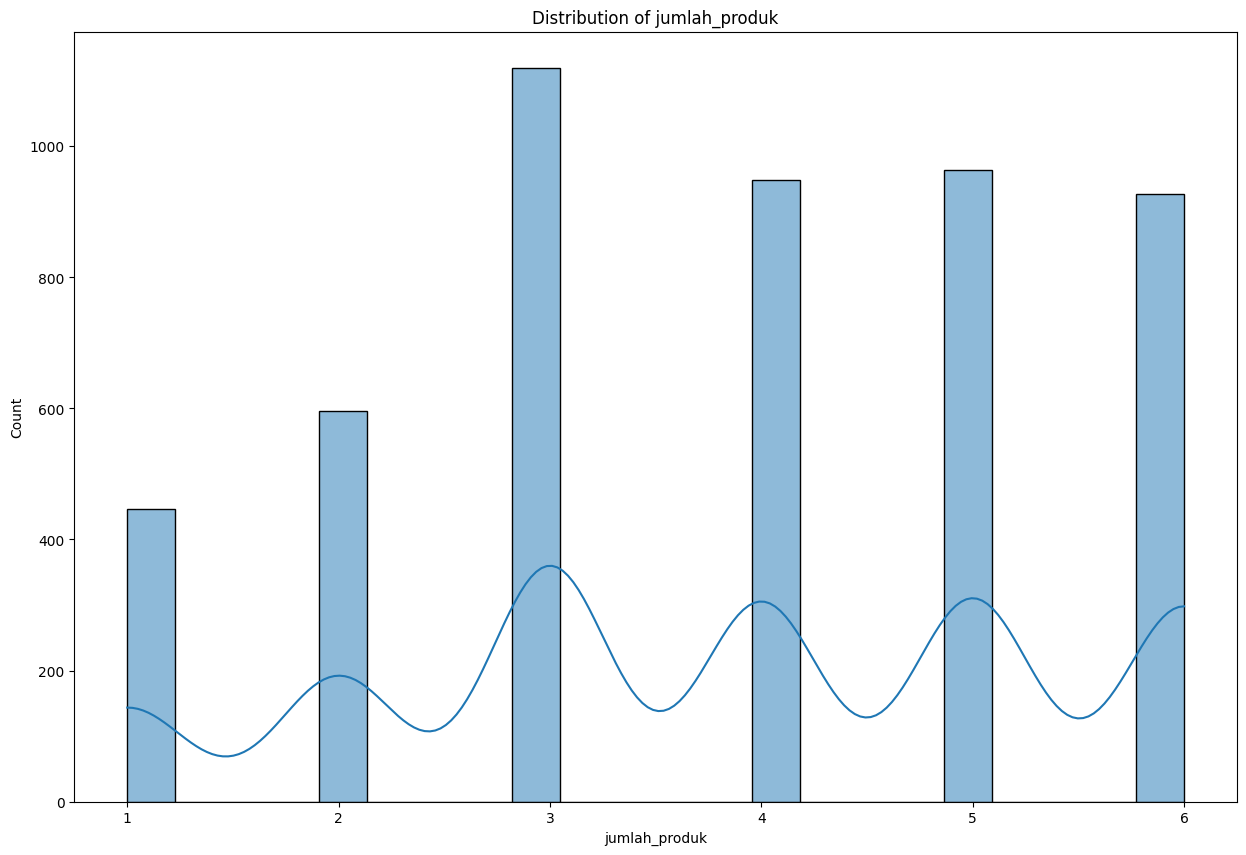

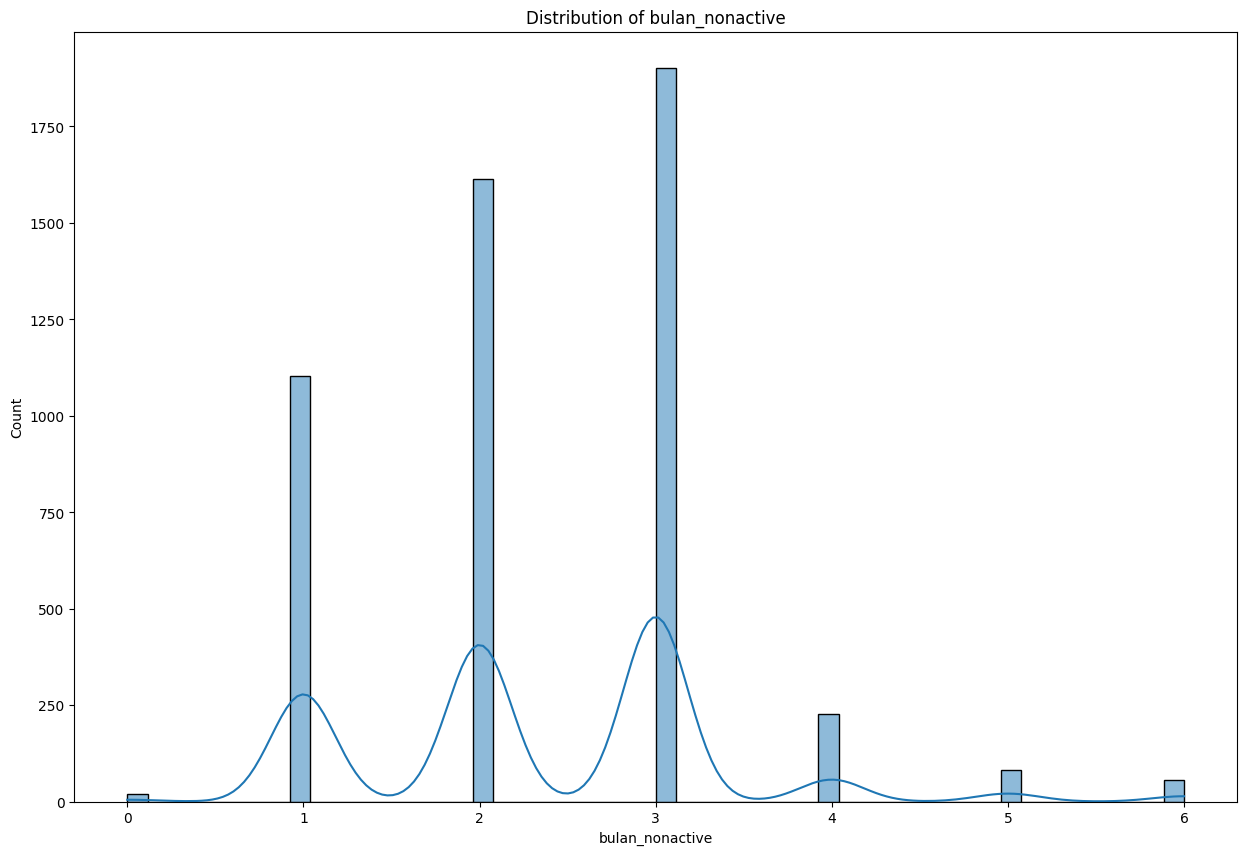

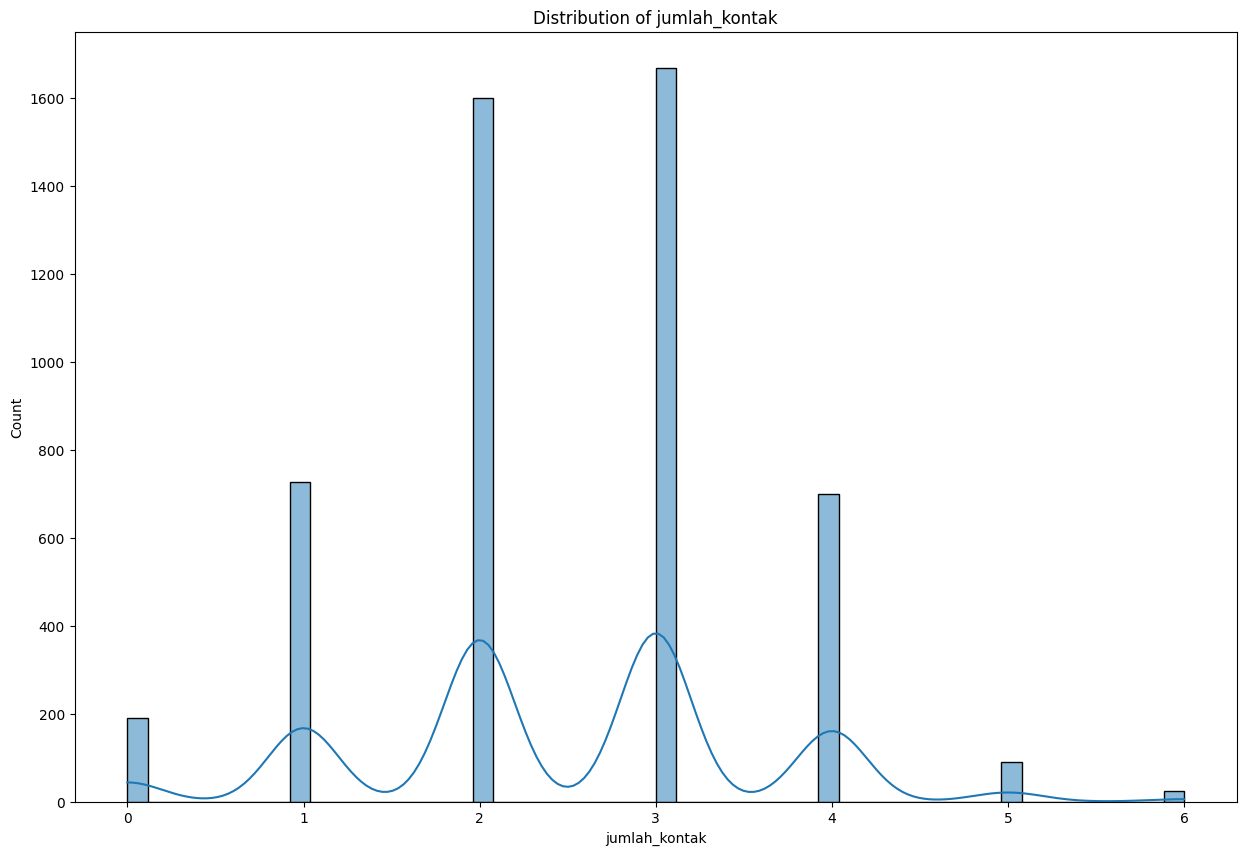

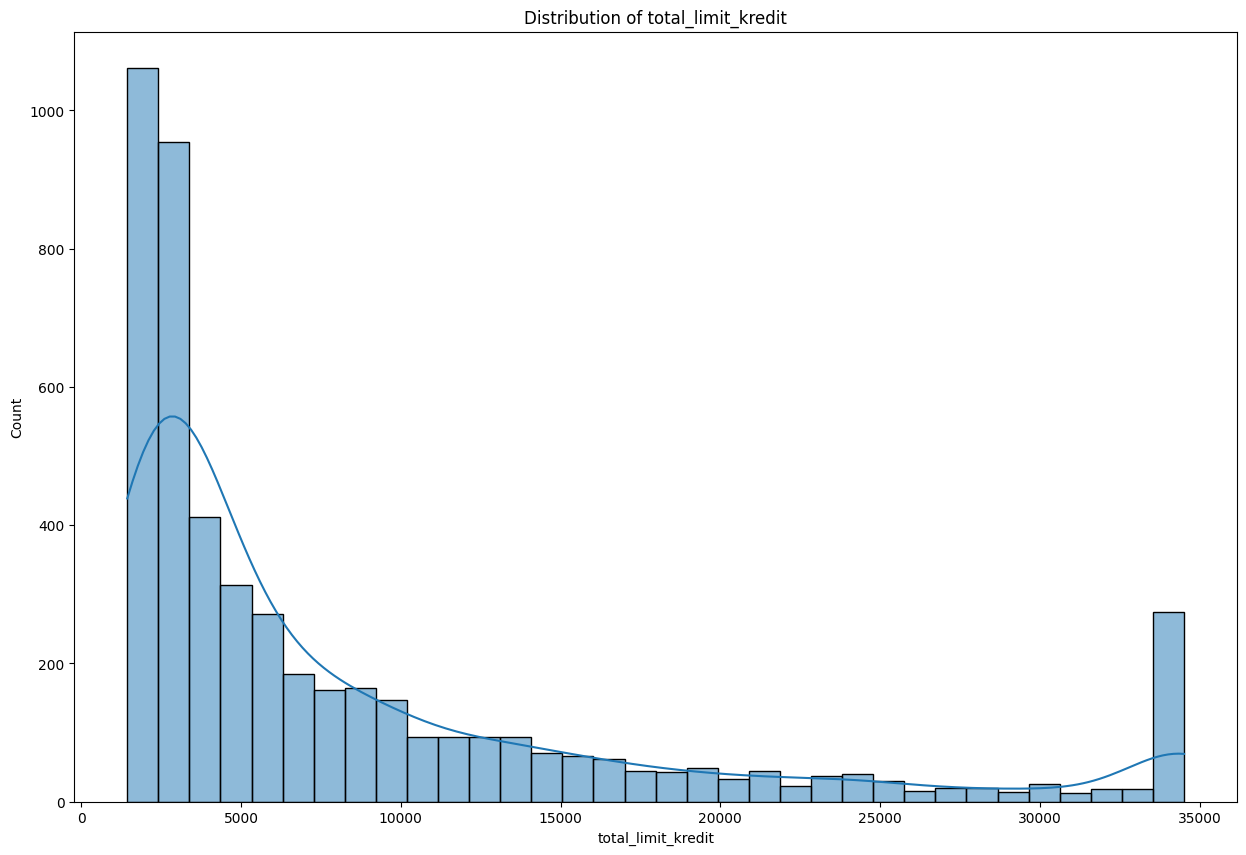

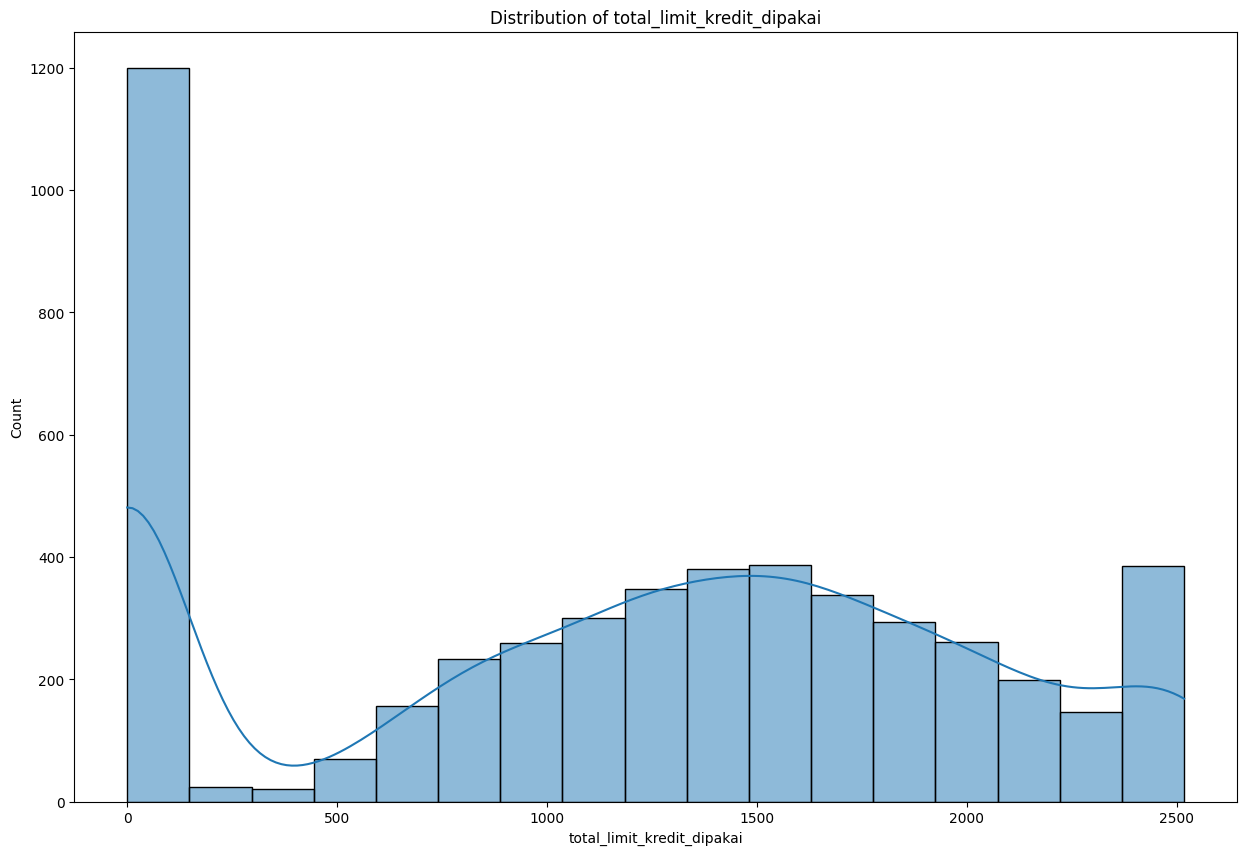

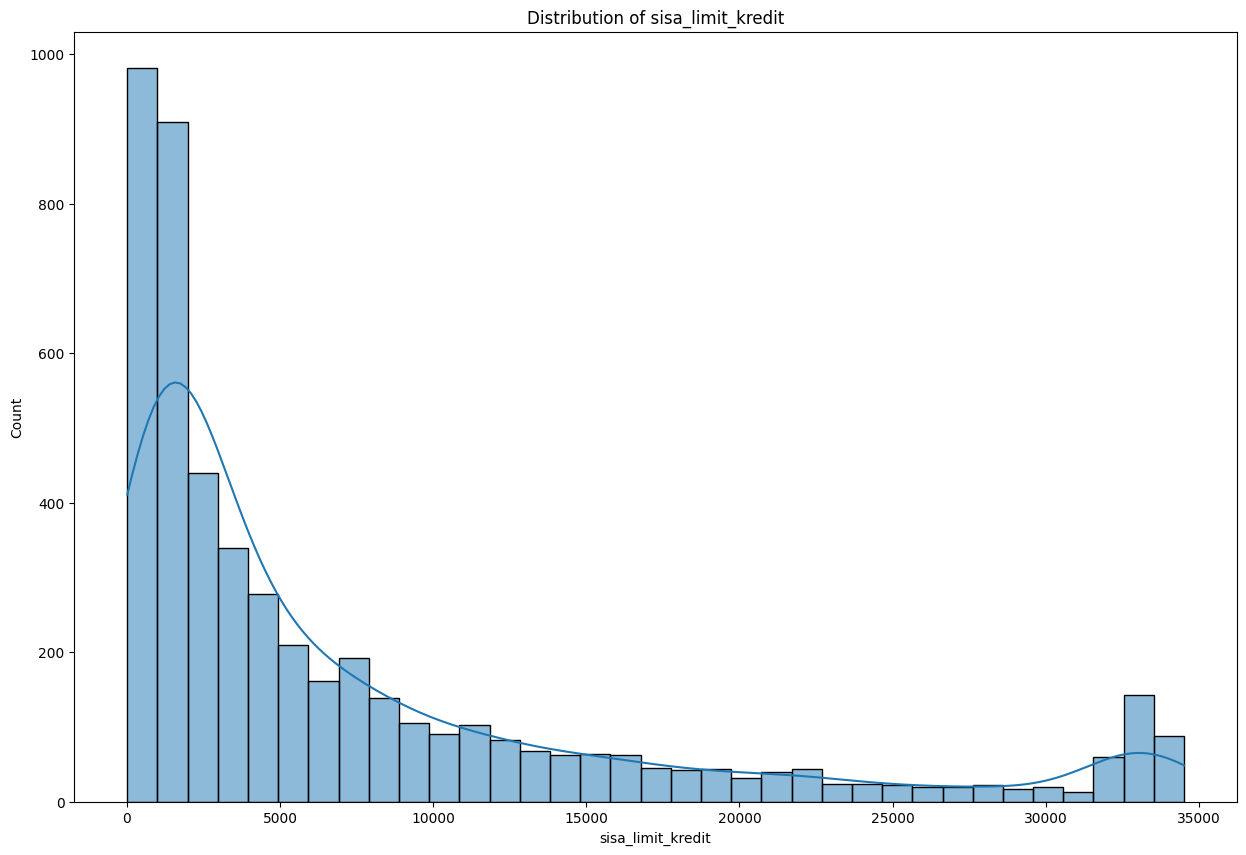

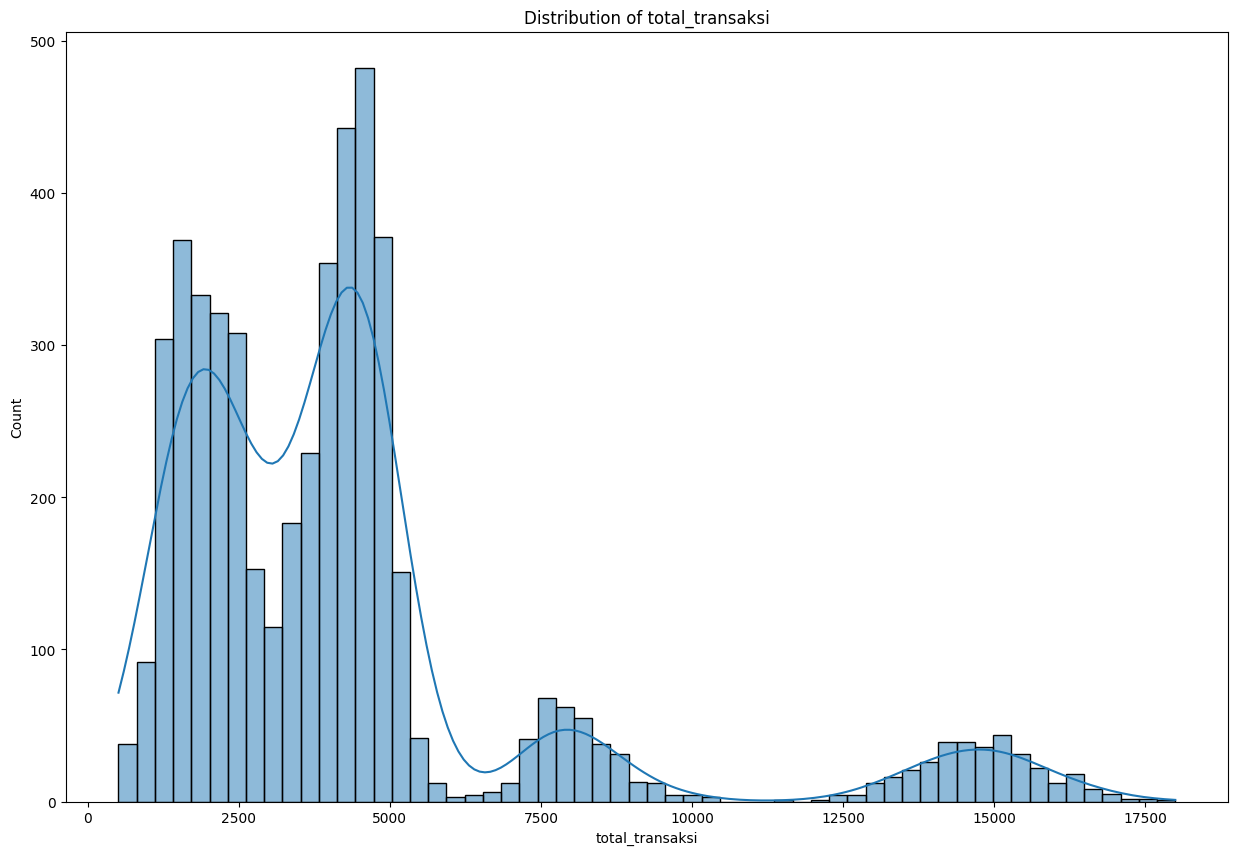

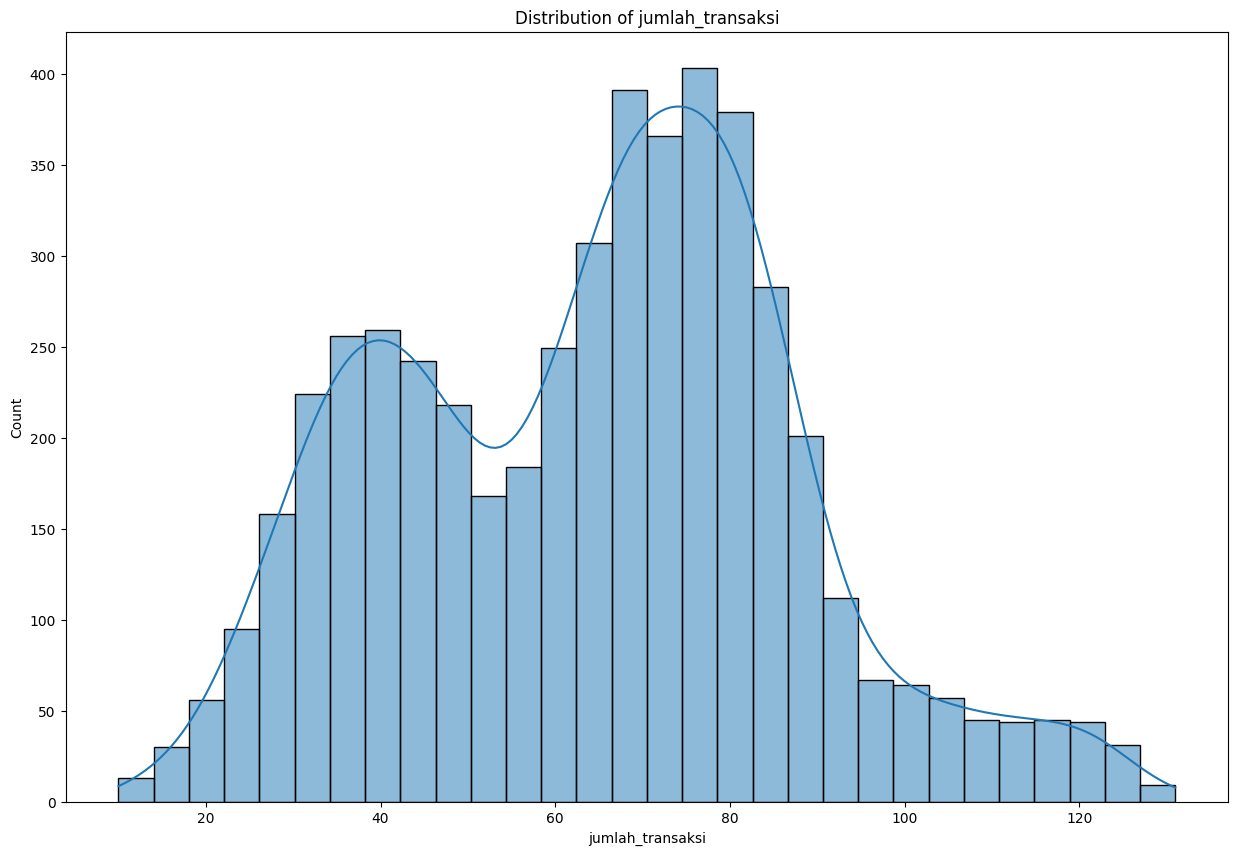

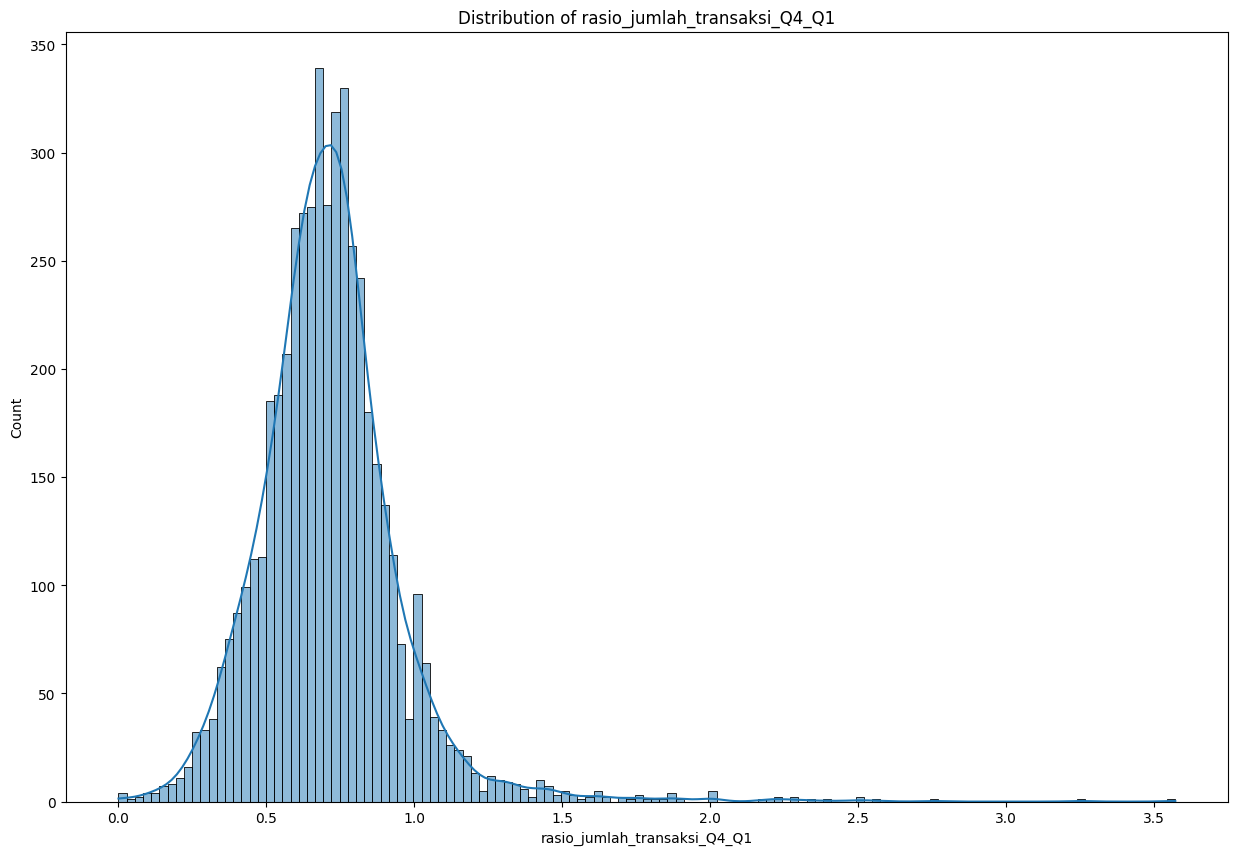

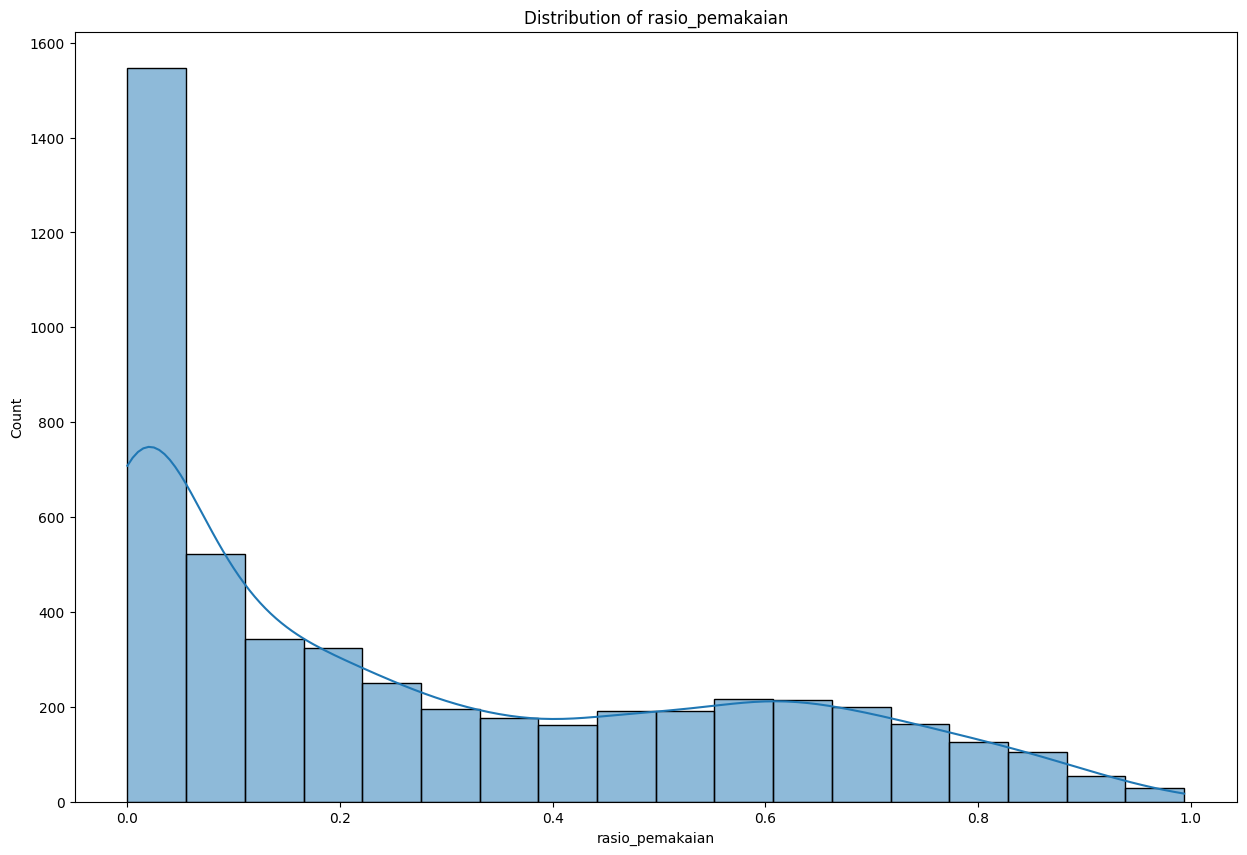

In [20]:
for feature in numerical_features:
    plt.figure(figsize=(15, 10))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


bivariate

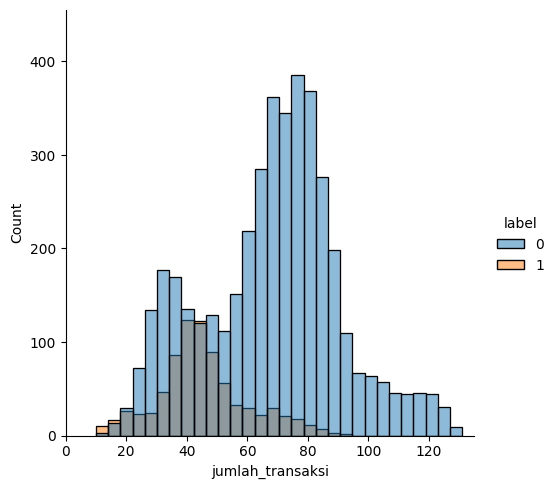

In [21]:
sns.displot(data=df,x='jumlah_transaksi', hue='label')
plt.xlim([0,135])
plt.ylim([0,455])
plt.show()


In [9]:
import plotly.express as px

fig = px.histogram(df, x='gender', color='label',
                   title='Churn Rates Bedasarkan Gender',
                   labels={'gender': 'Gender', 'label': 'Churn Status'},
                   template='plotly_white', barmode='group',
                   color_discrete_map={0: '#2ca02c', 1: '#d62728'}
                  )

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()


In [12]:
fig = px.histogram(df, x='pendidikan', color='label',
             title='Churn Rates berdasarkan pendidikan',
             labels={'country': 'Country', 'state': 'Project State'},
             template='plotly_white', barmode='group',
             color_discrete_sequence=['#2ca02c', '#d62728']
            )
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()

In [17]:
fig = px.histogram(df, x='status_nikah', color='label',
             title='Churn Rates berdasarkan pernikahan',
             labels={'country': 'Country', 'state': 'Project State'},
             template='plotly_white', barmode='group',
             color_discrete_sequence=['#2ca02c', '#d62728']
            )
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()

In [18]:
fig = px.histogram(df, x='penghasilan_tahunan', color='label',
             title='Churn Rates berdasarkan penghasilan tahunan',
             labels={'country': 'Country', 'state': 'Project State'},
             template='plotly_white', barmode='group',
             color_discrete_sequence=['#2ca02c', '#d62728']
            )

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()

In [20]:
fig = px.histogram(df, x='usia', color='label',
             title='Churn Rates Berdasarkan Umur',
             labels={'country': 'Country', 'state': 'Project State'},
             template='plotly_white', barmode='group',
             color_discrete_sequence=['#2ca02c', '#d62728']
            )

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()

In [23]:
fig = px.histogram(df, x='tipe_kartu_kredit', color='label',
             title='Churn Rates by tipe kartu',
             labels={'country': 'Country', 'state': 'Project State'},
             template='plotly_white', barmode='group',
             color_discrete_sequence=['#2ca02c', '#d62728']
            )

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()

<Axes: >

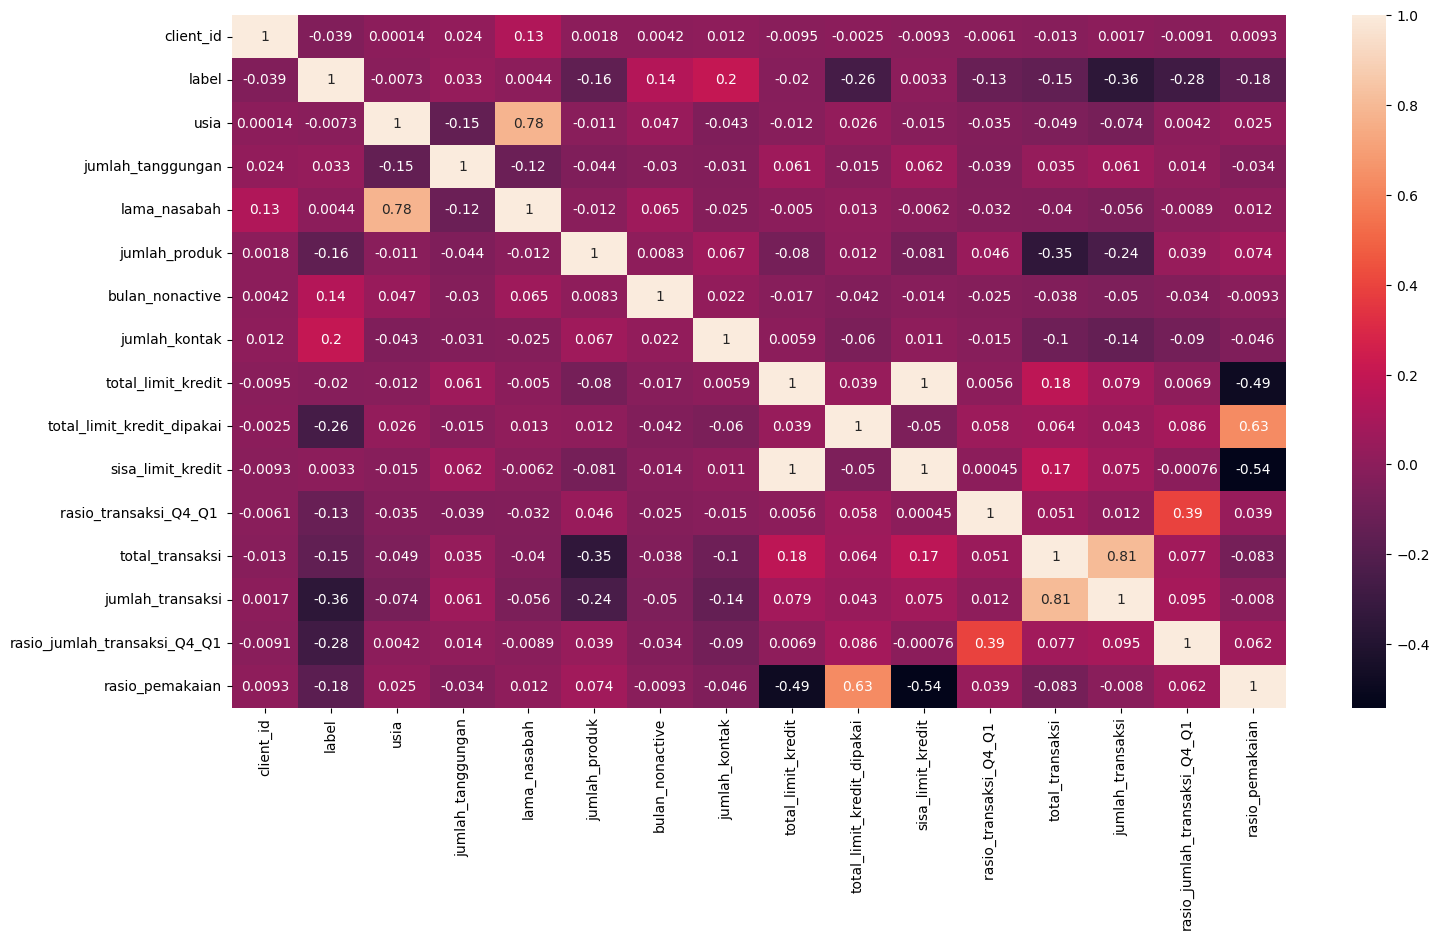

In [22]:
#heat map
plt.figure(figsize = (17,9))
sns.color_palette("pastel")
sns.heatmap(df.corr(numeric_only=True),annot=True)


In [23]:
categorical_features

['label',
 'gender',
 'pendidikan',
 'status_pernikahan',
 'penghasilan_tahunan',
 'tipe_kartu_kredit']

##data prosesing


## konversi data

In [24]:
df.drop(columns=['client_id'],inplace=True)

In [25]:


df['gender'] = df['gender'].map({'M': 1, 'F': 0})
edu_level_dic = {'Unknown': 0,'Uneducated': 1,'High School': 2,'College': 3,'Post-Graduate': 4,'Graduate': 5,'Doctorate': 6}
income_cat_dic = {'Unknown': 0,'Less than $40K': 1,'$40K - $60K': 2,'$60K - $80K': 3,'$80K - $120K': 4,'$120K +': 5}
card_cat_dic = {'Blue': 0,'Silver': 1,'Gold': 2,'Platinum': 3}

df['penghasilan_tahunan'] = df['penghasilan_tahunan'].map(income_cat_dic)
df['tipe_kartu_kredit'] = df['tipe_kartu_kredit'].map(card_cat_dic)
df['pendidikan'] = df['pendidikan'].map(edu_level_dic)
df.head()


,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
0,0,48,0,3,1,Single,1,0,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,0,59,1,1,1,Single,1,0,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,0,37,0,2,5,Divorced,1,0,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,0,47,1,3,6,Divorced,2,0,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,0,42,1,3,0,Single,4,0,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584


In [26]:
# Working with Nominal Features with pandas `get_dummies` function.
df = pd.get_dummies(df, columns=['gender', 'status_nikah'])

encoded = list(df.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

24 total features after one-hot encoding.


In [27]:
df.columns

Index(['label', 'usia', 'jumlah_tanggungan', 'pendidikan',
       'penghasilan_tahunan', 'tipe_kartu_kredit', 'lama_nasabah',
       'jumlah_produk', 'bulan_nonactive', 'jumlah_kontak',
       'total_limit_kredit', 'total_limit_kredit_dipakai', 'sisa_limit_kredit',
       'rasio_transaksi_Q4_Q1 ', 'total_transaksi', 'jumlah_transaksi',
       'rasio_jumlah_transaksi_Q4_Q1', 'rasio_pemakaian', 'gender_0',
       'gender_1', 'status_nikah_Divorced', 'status_nikah_Married',
       'status_nikah_Single', 'status_nikah_Unknown'],
      dtype='object')

In [28]:
print(df['pendidikan'].unique())


[1 5 6 0 2 3 4]


In [29]:
df.head()

,label,usia,jumlah_tanggungan,pendidikan,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,...,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,gender_0,gender_1,status_nikah_Divorced,status_nikah_Married,status_nikah_Single,status_nikah_Unknown
0,0,48,3,1,1,0,39,4,3,4,...,3734,64,0.882,0.504,True,False,False,False,True,False
1,0,59,1,1,1,0,53,5,5,4,...,4010,79,0.717,0.716,False,True,False,False,True,False
2,0,37,2,5,1,0,36,4,3,3,...,4727,67,0.914,0.569,True,False,True,False,False,False
3,0,47,3,6,2,0,36,4,2,3,...,4973,74,0.850,0.317,False,True,True,False,False,False
4,0,42,3,0,4,0,33,3,3,2,...,1454,35,0.522,0.584,False,True,False,False,True,False


##Data spliting

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [31]:
X = df.drop(columns=['label'])
y = df.label

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# menampilkan hasil data spliting
print("data training {} samples.".format(X_train.shape[0]))
print("data testing  {} samples.".format(X_test.shape[0]))

data training 4000 samples.
data testing  1000 samples.


In [33]:
df.head()

,label,usia,jumlah_tanggungan,pendidikan,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,...,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,gender_0,gender_1,status_nikah_Divorced,status_nikah_Married,status_nikah_Single,status_nikah_Unknown
0,0,48,3,1,1,0,39,4,3,4,...,3734,64,0.882,0.504,True,False,False,False,True,False
1,0,59,1,1,1,0,53,5,5,4,...,4010,79,0.717,0.716,False,True,False,False,True,False
2,0,37,2,5,1,0,36,4,3,3,...,4727,67,0.914,0.569,True,False,True,False,False,False
3,0,47,3,6,2,0,36,4,2,3,...,4973,74,0.850,0.317,False,True,True,False,False,False
4,0,42,3,0,4,0,33,3,3,2,...,1454,35,0.522,0.584,False,True,False,False,True,False


In [34]:
X_train

,usia,jumlah_tanggungan,pendidikan,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,...,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,gender_0,gender_1,status_nikah_Divorced,status_nikah_Married,status_nikah_Single,status_nikah_Unknown
4227,45,4,5,3,0,37,5,2,4,6784.0,...,1900,28,0.556,0.131,False,True,True,False,False,False
4676,60,1,0,2,0,41,3,2,4,2425.0,...,1522,36,0.200,0.000,True,False,False,False,True,False
800,42,4,0,0,0,36,1,4,2,7469.0,...,8281,80,0.739,0.112,True,False,False,True,False,False
3671,38,2,0,3,0,33,2,3,2,12871.0,...,2413,53,0.606,0.000,False,True,False,False,True,False
4193,39,3,0,4,1,36,5,3,2,34516.0,...,1668,36,0.714,0.055,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,45,2,6,1,0,31,4,3,4,2704.0,...,2362,39,0.444,0.837,True,False,False,True,False,False
466,44,2,5,0,0,26,2,1,3,2006.0,...,5337,85,0.735,0.513,True,False,False,True,False,False
3092,49,2,0,5,0,38,3,6,3,16494.0,...,7761,84,0.647,0.070,False,True,False,True,False,False
3772,36,3,2,1,0,36,3,3,3,2977.0,...,2201,39,0.345,0.450,True,False,False,True,False,False


In [35]:
y_train

4227    0
4676    1
800     0
3671    1
4193    0
       ..
4426    1
466     0
3092    0
3772    1
860     1
Name: label, Length: 4000, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   label                         5000 non-null   int64  
 1   usia                          5000 non-null   int64  
 2   jumlah_tanggungan             5000 non-null   int64  
 3   pendidikan                    5000 non-null   int64  
 4   penghasilan_tahunan           5000 non-null   int64  
 5   tipe_kartu_kredit             5000 non-null   int64  
 6   lama_nasabah                  5000 non-null   int64  
 7   jumlah_produk                 5000 non-null   int64  
 8   bulan_nonactive               5000 non-null   int64  
 9   jumlah_kontak                 5000 non-null   int64  
 10  total_limit_kredit            5000 non-null   float64
 11  total_limit_kredit_dipakai    5000 non-null   int64  
 12  sisa_limit_kredit             5000 non-null   float64
 13  ras

In [37]:
df.head()


,label,usia,jumlah_tanggungan,pendidikan,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,...,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,gender_0,gender_1,status_nikah_Divorced,status_nikah_Married,status_nikah_Single,status_nikah_Unknown
0,0,48,3,1,1,0,39,4,3,4,...,3734,64,0.882,0.504,True,False,False,False,True,False
1,0,59,1,1,1,0,53,5,5,4,...,4010,79,0.717,0.716,False,True,False,False,True,False
2,0,37,2,5,1,0,36,4,3,3,...,4727,67,0.914,0.569,True,False,True,False,False,False
3,0,47,3,6,2,0,36,4,2,3,...,4973,74,0.850,0.317,False,True,True,False,False,False
4,0,42,3,0,4,0,33,3,3,2,...,1454,35,0.522,0.584,False,True,False,False,True,False


# imbalance data

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
y_train.value_counts()

label
0    3349
1     651
Name: count, dtype: int64

In [40]:
# Menggunakan data undersampling karena dapat meningkatkan kualitas prediksi ketika data awal tidak seimbang.
smote = SMOTE(random_state = 0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print('Before SMOTE')
print(pd.DataFrame(y_train).value_counts())
print('After SMOTE')
print(pd.DataFrame(y_resampled).value_counts())
#imbalace oversampling

Before SMOTE
label
0        3349
1         651
Name: count, dtype: int64
After SMOTE
label
0        3349
1        3349
Name: count, dtype: int64


In [41]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting the StandardScaler on the training data
scaler.fit(X_train[numerical_features])

# Transforming (standardize) the continuous features in the training and testing data
X_train_cont_scaled = scaler.transform(X_train[numerical_features])
X_test_cont_scaled = scaler.transform(X_test[numerical_features])

# Replacing the scaled continuous features in the original data
X_train[numerical_features] = X_train_cont_scaled
X_test[numerical_features] = X_test_cont_scaled

X_train

,usia,jumlah_tanggungan,pendidikan,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,...,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian,gender_0,gender_1,status_nikah_Divorced,status_nikah_Married,status_nikah_Single,status_nikah_Unknown
4227,-0.166176,1.251116,5,3,0,0.139477,0.758024,-0.332143,1.399269,-0.210786,...,-0.730285,-1.570174,-0.650688,-0.522459,False,True,True,False,False,False
4676,1.698179,-1.038907,0,2,0,0.644257,-0.529490,-0.332143,1.399269,-0.686776,...,-0.843212,-1.225043,-2.167713,-0.993331,True,False,False,False,True,False
800,-0.539047,1.251116,0,0,0,0.013282,-1.817004,1.688499,-0.425071,-0.135986,...,1.176029,0.673178,0.129131,-0.590754,True,False,False,True,False,False
3671,-1.036209,-0.275566,0,3,0,-0.365303,-1.173247,0.678178,-0.425071,0.453896,...,-0.577027,-0.491639,-0.437622,-0.993331,False,True,False,False,True,False
4193,-0.911918,0.487775,0,4,1,0.013282,0.758024,0.678178,-0.425071,2.817466,...,-0.799595,-1.225043,0.022599,-0.795637,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,-0.166176,-0.275566,6,1,0,-0.617693,0.114267,0.678178,1.399269,-0.656310,...,-0.592263,-1.095619,-1.127954,2.015217,True,False,False,True,False,False
466,-0.290467,-0.275566,5,0,0,-1.248668,-1.173247,-1.342464,0.487099,-0.732530,...,0.296513,0.888885,0.112086,0.850618,True,False,False,True,False,False
3092,0.330985,-0.275566,0,5,0,0.265672,-0.529490,3.709141,0.487099,0.849517,...,1.020680,0.845744,-0.262909,-0.741720,False,True,False,True,False,False
3772,-1.284789,0.487775,2,1,0,0.013282,-0.529490,0.678178,0.487099,-0.626500,...,-0.640362,-1.095619,-1.549823,0.624168,True,False,False,True,False,False


#modeling


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.feature_selection import  RFE
import lightgbm as lgb
from sklearn.pipeline import Pipeline


##Logistic regression

In [43]:
# Train model
log_model = LogisticRegression().fit(X_resampled, y_resampled)

# Predict
log_y_test_pred = log_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# Initialize RFE feature selector
RFE_selector = RFE(lgb.LGBMClassifier(random_state=42, verbose=-1), n_features_to_select=12)



In [45]:
pipeline = Pipeline(steps=[
    ('feature_selector', RFE_selector),
    ('logistic_regression', LogisticRegression(random_state=42))
])

pipeline.fit(X_train, y_train)

# prediksi pada data test
y_pred = pipeline.predict(X_test)

# menghitung  F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Evaluasi pada data training
y_train_pred = pipeline.predict(X_train)
print("Confusion Matrix (Training Data):")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

# Evaluasi pada data test
y_test_pred = pipeline.predict(X_test)
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Confusion Matrix (Training Data):
[[3223  126]
 [ 282  369]]

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3349
           1       0.75      0.57      0.64       651

    accuracy                           0.90      4000
   macro avg       0.83      0.76      0.79      4000
weighted avg       0.89      0.90      0.89      4000

Confusion Matrix (Test Data):
[[825  26]
 [ 72  77]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       851
           1       0.75      0.52      0.61       149

    accuracy                           0.90      1000
   macro avg       0.83      0.74      0.78      1000
weighted avg       0.89      0.90      0.89      1000



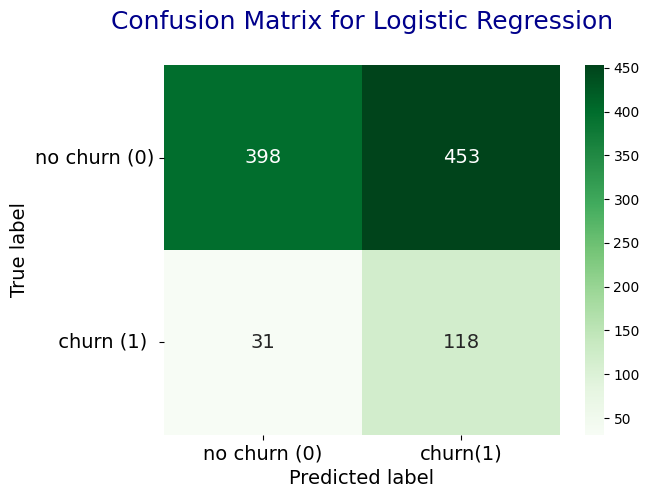

In [46]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, log_y_test_pred)),
                                   ('no churn (0)', ' churn (1) '),
                                   ('no churn (0)', 'churn(1)'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'Greens')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Logistic Regression\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

evaluasi model logistic regression

In [47]:
#membuat parameter grid
param_grid = {
     'logistic_regression__penalty':['l1','l2','elasticnet'],
    'logistic_regression__C' : [0.001,0.01,0.1,1],
}

In [48]:
#pembuiatan pipeline
steps=[]
steps.append(('feature_selector', RFE_selector))
steps.append(("logistic_regression", LogisticRegression(random_state=42)))
pipeline=Pipeline(steps=steps)

In [49]:
# Create GridSearchCV instance
grid_search_lg= GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,
                           return_train_score=True)

# Fit the pipeline with GridSearch to the data
grid_search_lg.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search_lg.best_params_
best_score = grid_search_lg.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

Best Parameters: {'logistic_regression__C': 0.1, 'logistic_regression__penalty': 'l2'}
Best Score: 0.8957499999999999


In [50]:
# Get the mean test score and mean train score for the best estimator
mean_test_score = grid_search_lg.cv_results_['mean_test_score'][grid_search_lg.best_index_]
mean_train_score = grid_search_lg.cv_results_['mean_train_score'][grid_search_lg.best_index_]

print("Mean Test Score:", mean_test_score)
print("Mean Train Score:", mean_train_score)

Mean Test Score: 0.8957499999999999
Mean Train Score: 0.8969375000000002


##randm Forest

In [51]:
# Train model
rf_model = RandomForestClassifier(random_state = 42).fit(X_resampled, y_resampled)

# Predict
rf_y_test_pred = rf_model.predict(X_test)

In [52]:
pipeline = Pipeline(steps=[
    ('feature_selector', RFE_selector),
    ('RandomForestClassifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

# Predictions on test data
y_pred = pipeline.predict(X_test)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

from sklearn.metrics import confusion_matrix, classification_report

# Evaluasi pada data training
y_train_pred = pipeline.predict(X_train)
print("Confusion Matrix (Training Data):")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

# Evaluasi pada data test
y_test_pred = pipeline.predict(X_test)
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Confusion Matrix (Training Data):
[[3349    0]
 [   0  651]]

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3349
           1       1.00      1.00      1.00       651

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Confusion Matrix (Test Data):
[[847   4]
 [ 27 122]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       851
           1       0.97      0.82      0.89       149

    accuracy                           0.97      1000
   macro avg       0.97      0.91      0.93      1000
weighted avg       0.97      0.97      0.97      1000



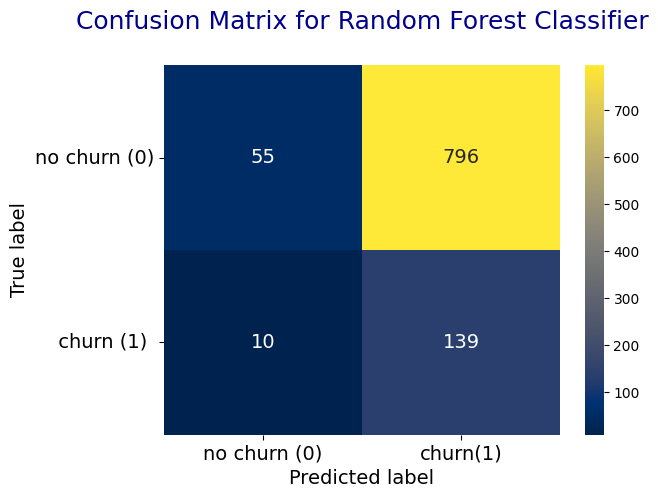

In [53]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, rf_y_test_pred)),
                                    ('no churn (0)', ' churn (1) '),
                                   ('no churn (0)', 'churn(1)'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'cividis')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Random Forest Classifier\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

##decission tree

In [54]:
# Membuat dan melatih model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Prediksi
y_pred = decision_tree.predict(X_test)


In [55]:
# Menghitung nilai akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 95.00%


evaluasi model

In [56]:
param_grid = {
    'DecisionTreeClassifier__max_depth' : [2,3,4],
    'DecisionTreeClassifier__min_samples_leaf':[50,75,100],
}

In [57]:
steps=[]
steps.append(('feature_selector', RFE_selector))
steps.append(("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)))
pipeline=Pipeline(steps=steps)

In [58]:
# Create GridSearchCV instance
grid_searchh= GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,
                           return_train_score=True)

# Fit the pipeline with GridSearch to the data
grid_searchh.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_searchh.best_params_
best_score = grid_searchh.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'DecisionTreeClassifier__max_depth': 4, 'DecisionTreeClassifier__min_samples_leaf': 50}
Best Score: 0.91225


In [59]:
# Get the mean test score and mean train score for the best estimator
mean_test_score = grid_searchh.cv_results_['mean_test_score'][grid_searchh.best_index_]
mean_train_score = grid_searchh.cv_results_['mean_train_score'][grid_searchh.best_index_]

print("Mean Test Score:", mean_test_score)
print("Mean Train Score:", mean_train_score)

Mean Test Score: 0.91225
Mean Train Score: 0.921875


In [60]:
# Define the pipeline with the feature selector
pipeline = Pipeline(steps=[
    ('feature_selector', RFE_selector),
    ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

# Predictions on test data
y_pred = pipeline.predict(X_test)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Printing model details
print(f'Model: DecisionTreeClassifier')
print(f'Training Accuracy: {accuracy_score(y_train, pipeline.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1-score: {f1}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Testing Classification report: \n{classification_report(y_test, y_pred)}')

Model: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.949
F1-score: 0.9483400144394405
Testing Confusion Matrix: 
[[830  21]
 [ 30 119]]
Testing Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       851
           1       0.85      0.80      0.82       149

    accuracy                           0.95      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.95      0.95      0.95      1000



##xgbost

In [61]:

# Membuat dan melatih model XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
# Prediksi
y_pred = xgb_model.predict(X_test)

In [63]:

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       851
           1       0.94      0.84      0.89       149

    accuracy                           0.97      1000
   macro avg       0.96      0.91      0.93      1000
weighted avg       0.97      0.97      0.97      1000



In [64]:
# Define the pipeline with the feature selector
pipeline = Pipeline(steps=[
    ('feature_selector', RFE_selector),
    ("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs =-1))
])

pipeline.fit(X_train, y_train)

# Predictions on test data
y_pred = pipeline.predict(X_test)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Printing model details
print(f'Model: XGBoost')
print(f'Training Accuracy: {accuracy_score(y_train, pipeline.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1-score: {f1}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Testing Classification report: \n{classification_report(y_test, y_pred)}')

Model: XGBoost
Training Accuracy: 1.0
Testing Accuracy: 0.967
F1-score: 0.9664735502846648
Testing Confusion Matrix: 
[[840  11]
 [ 22 127]]
Testing Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       851
           1       0.92      0.85      0.89       149

    accuracy                           0.97      1000
   macro avg       0.95      0.92      0.93      1000
weighted avg       0.97      0.97      0.97      1000



evaluasi model

In [65]:
param_grid = {
    'XGBoost__learning_rate': [0.01, 0.1, 0.2],
    'XGBoost__n_estimators': [100, 200, 300],
    'XGBoost__max_depth': [3, 4, 5],
}

In [66]:
steps=[]
steps.append(('feature_selector', RFE_selector))
steps.append(("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs =-1)))
pipeline=Pipeline(steps=steps)

In [67]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,
                           return_train_score=True)

# Fit the pipeline with GridSearch to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'XGBoost__learning_rate': 0.2, 'XGBoost__max_depth': 4, 'XGBoost__n_estimators': 200}
Best Score: 0.9650000000000001


In [68]:
# Get the mean test score and mean train score for the best estimator
mean_test_score = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
mean_train_score = grid_search.cv_results_['mean_train_score'][grid_search.best_index_]

print("Mean Test Score:", mean_test_score)
print("Mean Train Score:", mean_train_score)

Mean Test Score: 0.9650000000000001
Mean Train Score: 0.9999375


##svm

In [69]:

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = svm_model.predict(X_train)

# Predict on the test set
y_test_pred = svm_model.predict(X_test)

# Calculate accuracy for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Calculate accuracy for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Display classification report for training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

# Display classification report for test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 93.77%
Test Accuracy: 92.60%
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3349
           1       0.91      0.69      0.78       651

    accuracy                           0.94      4000
   macro avg       0.92      0.84      0.87      4000
weighted avg       0.94      0.94      0.93      4000

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       851
           1       0.88      0.58      0.70       149

    accuracy                           0.93      1000
   macro avg       0.90      0.78      0.83      1000
weighted avg       0.92      0.93      0.92      1000



evaluasi model

In [70]:
param_grid = {
  'SVC__C': [0.1, 1, 10, 100],
    'SVC__kernel': ['linear'],
    'SVC__gamma': ['scale', 'auto'],
}

In [71]:
steps=[]
steps.append(('feature_selector', RFE_selector))
steps.append(("SVC", SVC (random_state=42)))
pipeline=Pipeline(steps=steps)

In [72]:
# Create GridSearchCV instance
grid_searchh= GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,
                           return_train_score=True)

# Fit the pipeline with GridSearch to the data
grid_searchh.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_searchh.best_params_
best_score = grid_searchh.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'SVC__C': 10, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}
Best Score: 0.8985


In [73]:
# Get the mean test score and mean train score for the best estimator
mean_test_score = grid_searchh.cv_results_['mean_test_score'][grid_searchh.best_index_]
mean_train_score = grid_searchh.cv_results_['mean_train_score'][grid_searchh.best_index_]

print("Mean Test Score:", mean_test_score)
print("Mean Train Score:", mean_train_score)

Mean Test Score: 0.8985
Mean Train Score: 0.9010624999999999


##KNN

In [74]:

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Predict
y_train_pred = knn_model.predict(X_train)

# Predict
y_test_pred = knn_model.predict(X_test)

# Calculate accuracy for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Calculate accuracy for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# classification training
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

# classification test
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 93.53%
Test Accuracy: 90.00%
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3349
           1       0.89      0.69      0.78       651

    accuracy                           0.94      4000
   macro avg       0.92      0.84      0.87      4000
weighted avg       0.93      0.94      0.93      4000

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       851
           1       0.75      0.50      0.60       149

    accuracy                           0.90      1000
   macro avg       0.83      0.73      0.77      1000
weighted avg       0.89      0.90      0.89      1000



evaluasi model

In [75]:
param_grid = {
    'KNeighborsClassifier__n_neighbors' : np.arange(5,20),         # ada 15 item
    'KNeighborsClassifier__weights' : ['uniform','distance'],
}

In [76]:
steps=[]
steps.append(('feature_selector', RFE_selector))
steps.append(("KNeighborsClassifier",KNeighborsClassifier( n_jobs =-1)))
pipeline=Pipeline(steps=steps)

In [77]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,
                           return_train_score=True)

# Fit the pipeline with GridSearch to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'KNeighborsClassifier__n_neighbors': 6, 'KNeighborsClassifier__weights': 'distance'}
Best Score: 0.915


In [78]:
# Get the mean test score and mean train score for the best estimator
mean_test_score = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
mean_train_score = grid_search.cv_results_['mean_train_score'][grid_search.best_index_]

print("Mean Test Score:", mean_test_score)
print("Mean Train Score:", mean_train_score)

Mean Test Score: 0.915
Mean Train Score: 1.0


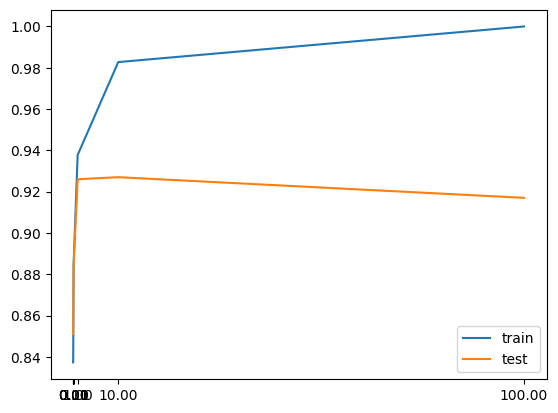

In [79]:
score_train = []

score_test = []

list_C = [0.0001,0.001,0.01, 0.1, 1, 10,100]

for k in list_C:
  model_svm = SVC(C=k)
  model_svm.fit(X_train,y_train)
  score_train.append(model_svm.score(X_train,y_train))
  score_test.append(model_svm.score(X_test,y_test))

import matplotlib.pyplot as plt

plt.plot(list_C, score_train, label='train')

plt.plot(list_C,score_test, label='test')

plt.xticks(list_C)

plt.legend()
